In [1]:
import numpy as np 
import pandas as  pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('../udemy-nbs/DATA/cluster_mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [6]:
df_w_dummies = pd.get_dummies(df.drop('name', axis=1))

In [7]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,False,False,True
388,44.0,4,97.0,52.0,2130,24.6,82,True,False,False
389,32.0,4,135.0,84.0,2295,11.6,82,False,False,True
390,28.0,4,120.0,79.0,2625,18.6,82,False,False,True


In [10]:
# pip install scikit-learn

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df_w_dummies)
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [14]:
scaled_df = pd.DataFrame(scaled_data, columns=df_w_dummies.columns)

In [15]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<Axes: >

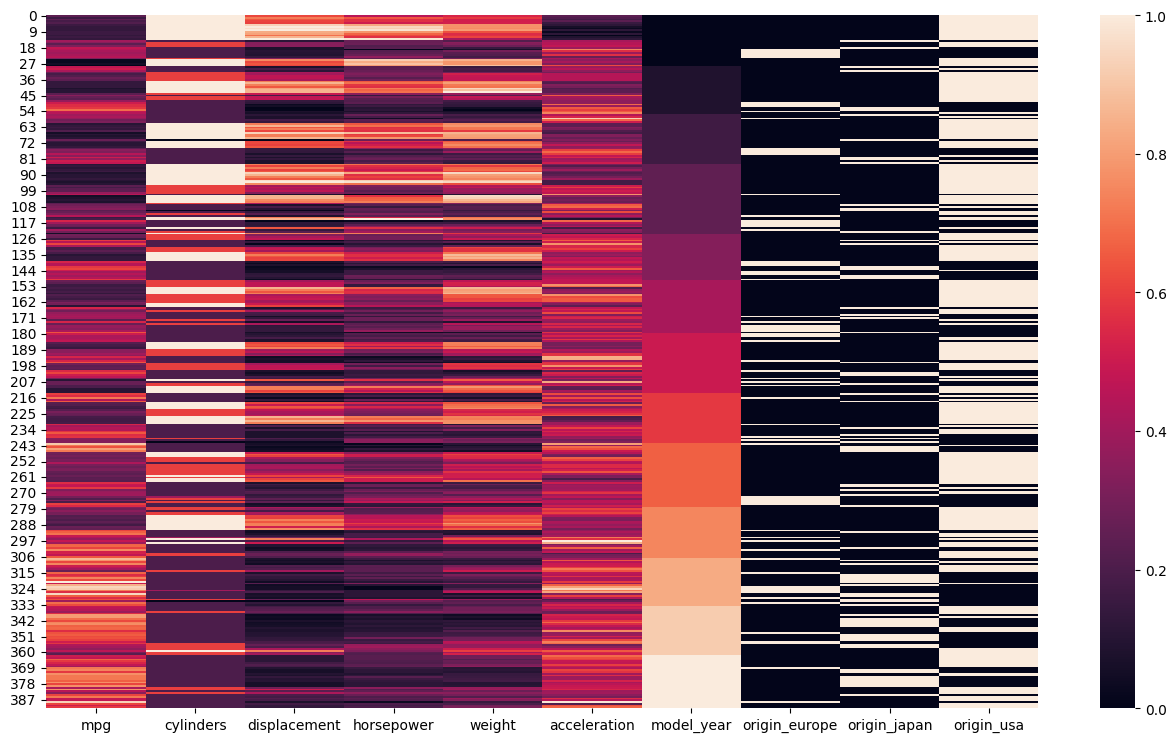

In [18]:
#heat map

plt.figure(figsize=(16,9))
sns.heatmap(scaled_df)

<Figure size 2000x1200 with 0 Axes>

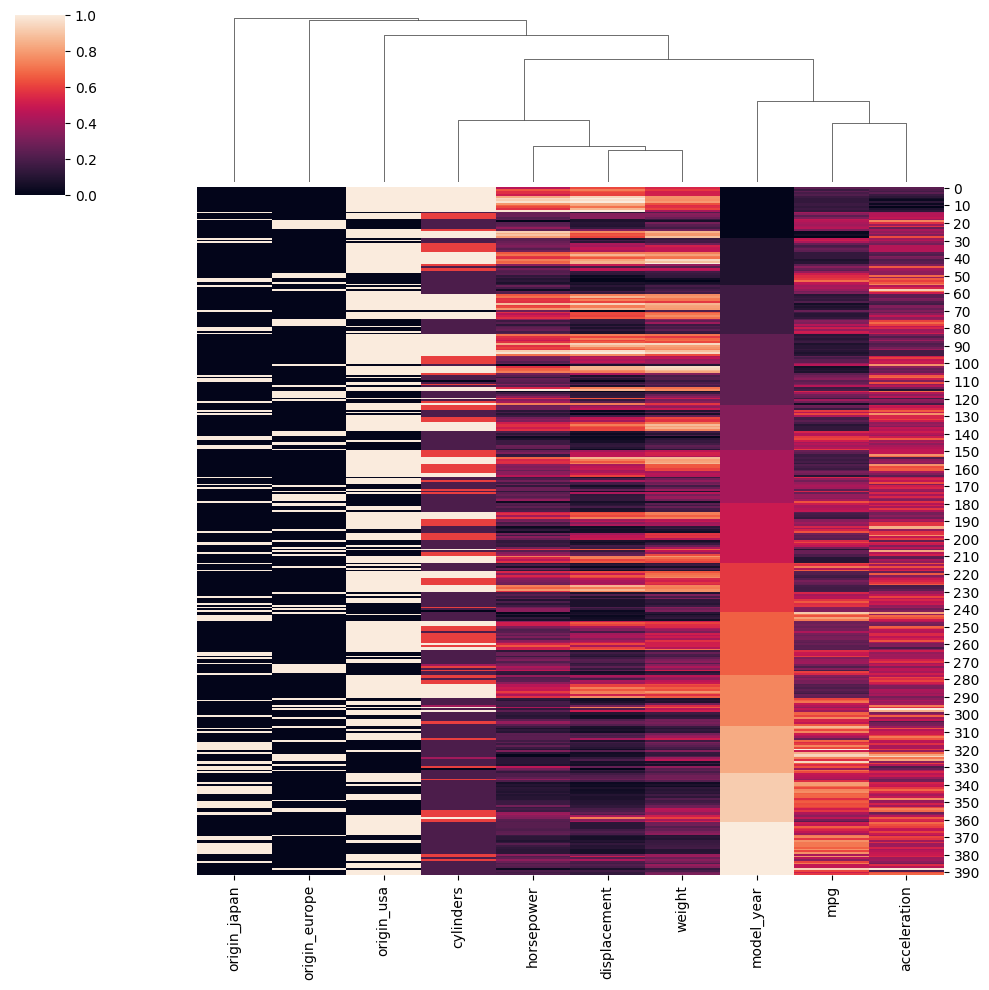

In [23]:
plt.figure(figsize=(20,12))

sns.clustermap(scaled_df, row_cluster=False)

In [24]:
scaled_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020,-0.258224
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841,-0.136065
origin_europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157,-0.591434
origin_japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000,-0.648583
origin_usa,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.591434,-0.648583,1.000000


<Axes: >

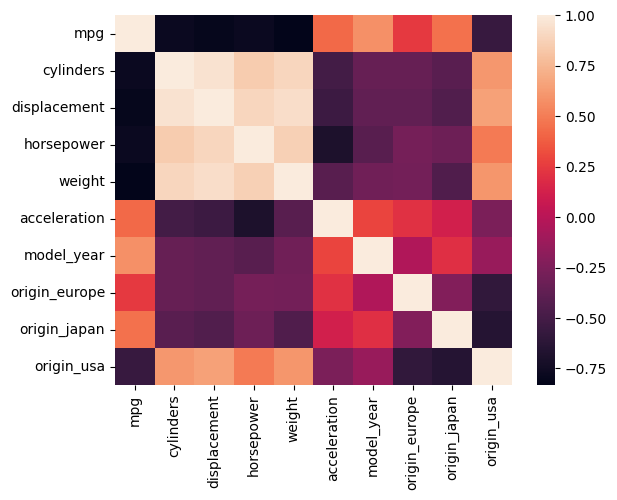

In [25]:
sns.heatmap(scaled_df.corr())

<Figure size 2000x1200 with 0 Axes>

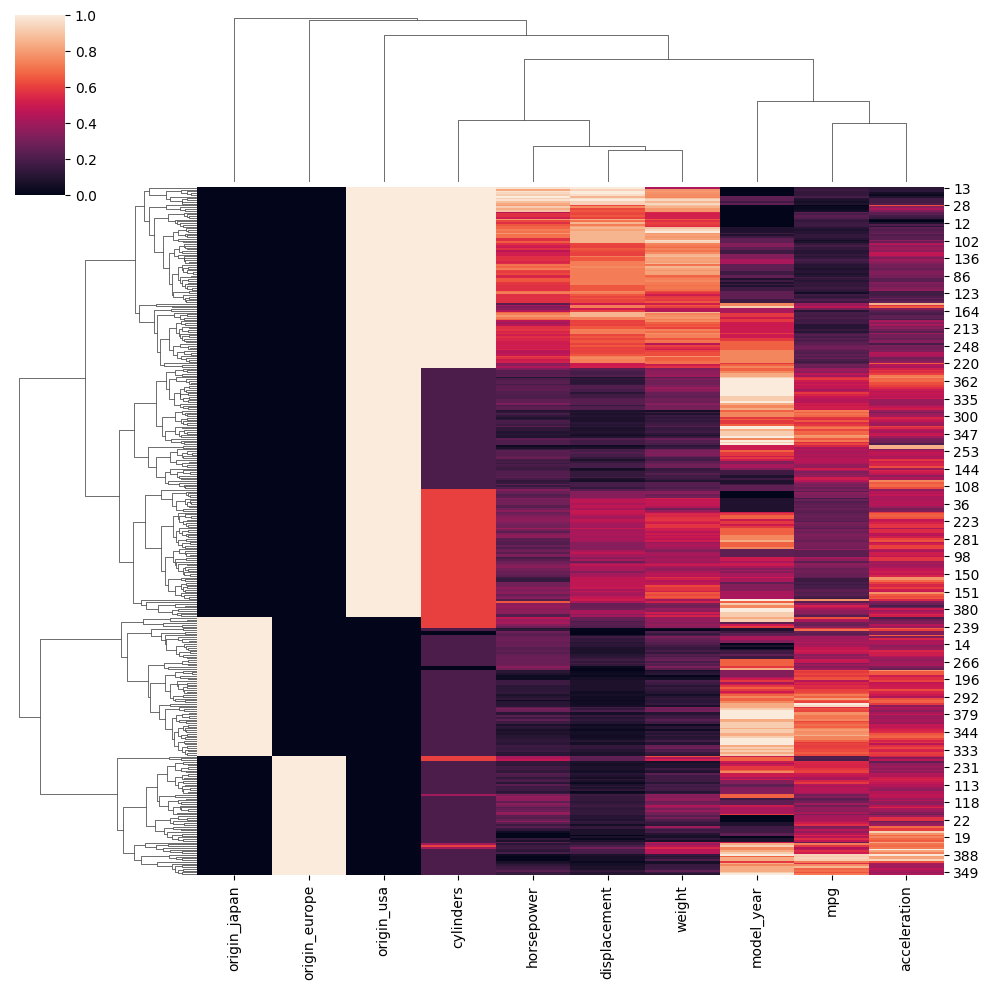

In [28]:
plt.figure(figsize=(20,12))

sns.clustermap(scaled_df)

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
model = AgglomerativeClustering(n_clusters=4)

In [31]:
cluster_labels = model.fit_predict(scaled_df)

In [32]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

<Axes: xlabel='mpg', ylabel='horsepower'>

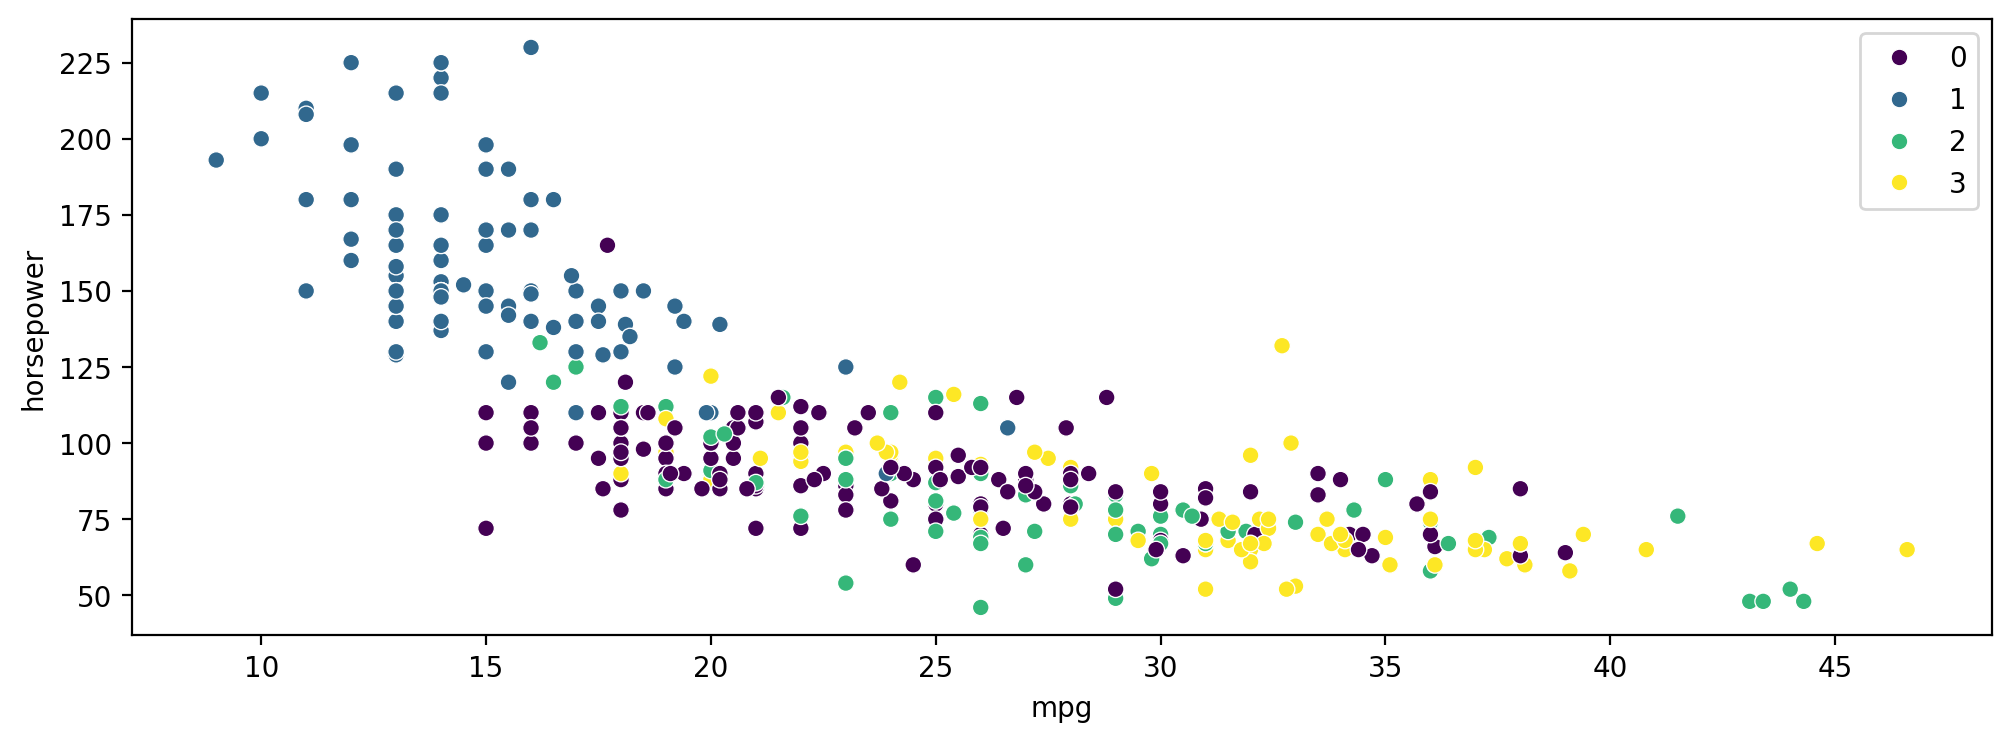

In [36]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_labels, palette='viridis')

### 1. `hue` Parameter
- **Purpose**: `hue` adds a categorical or numerical grouping to the scatterplot, visually differentiating points by color.
- **Here**:
  - `hue=cluster_labels` means the points in the scatterplot are colored based on their assigned cluster (from `cluster_labels`).
  - If `cluster_labels` is **categorical** (e.g., integers representing clusters), each cluster gets a unique color.
  - If `cluster_labels` is **numerical** (e.g., continuous values), a gradient color scale is used to represent the values.

### 2. `palette` Parameter
- **Purpose**: `palette` determines the color scheme for the plot.
- **Here**:
  - `palette='viridis'` specifies the use of the **Viridis color map**, a visually appealing gradient that goes from purple to yellow.
  - It is often used for **accessibility**, as it is perceptible by those with color vision deficiencies.


### Formula for Euclidean Distance

The Euclidean distance between two points **A** and **B** in an $n$-dimensional space is given by:

$d(A, B) = \sqrt{\sum_{i=1}^n (B_i - A_i)^2}$

### Explanation:
- $A = (A_1, A_2, \dots, A_n)$: Coordinates of point $A$.
- $B = (B_1, B_2, \dots, B_n)$: Coordinates of point $B$.
- $d(A, B)$: The Euclidean distance between the two points.

For two-dimensional space ($n = 2$):

$d(A, B) = \sqrt{(B_1 - A_1)^2 + (B_2 - A_2)^2}$

For three-dimensional space ($n = 3$):

$d(A, B) = \sqrt{(B_1 - A_1)^2 + (B_2 - A_2)^2 + (B_3 - A_3)^2}$


In [37]:
len(scaled_df.columns)

10

In [38]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
cluster_labels = model.fit(scaled_df)

In [40]:
cluster_labels.n_leaves_

392

In [41]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [42]:
linkage_matrix = hierarchy.linkage(model.children_)

In [45]:
linkage_matrix # 3rd column is the distance between 1 and 2 
                # column 1 and 2 is cluster number
                # column 4 no of points in it

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

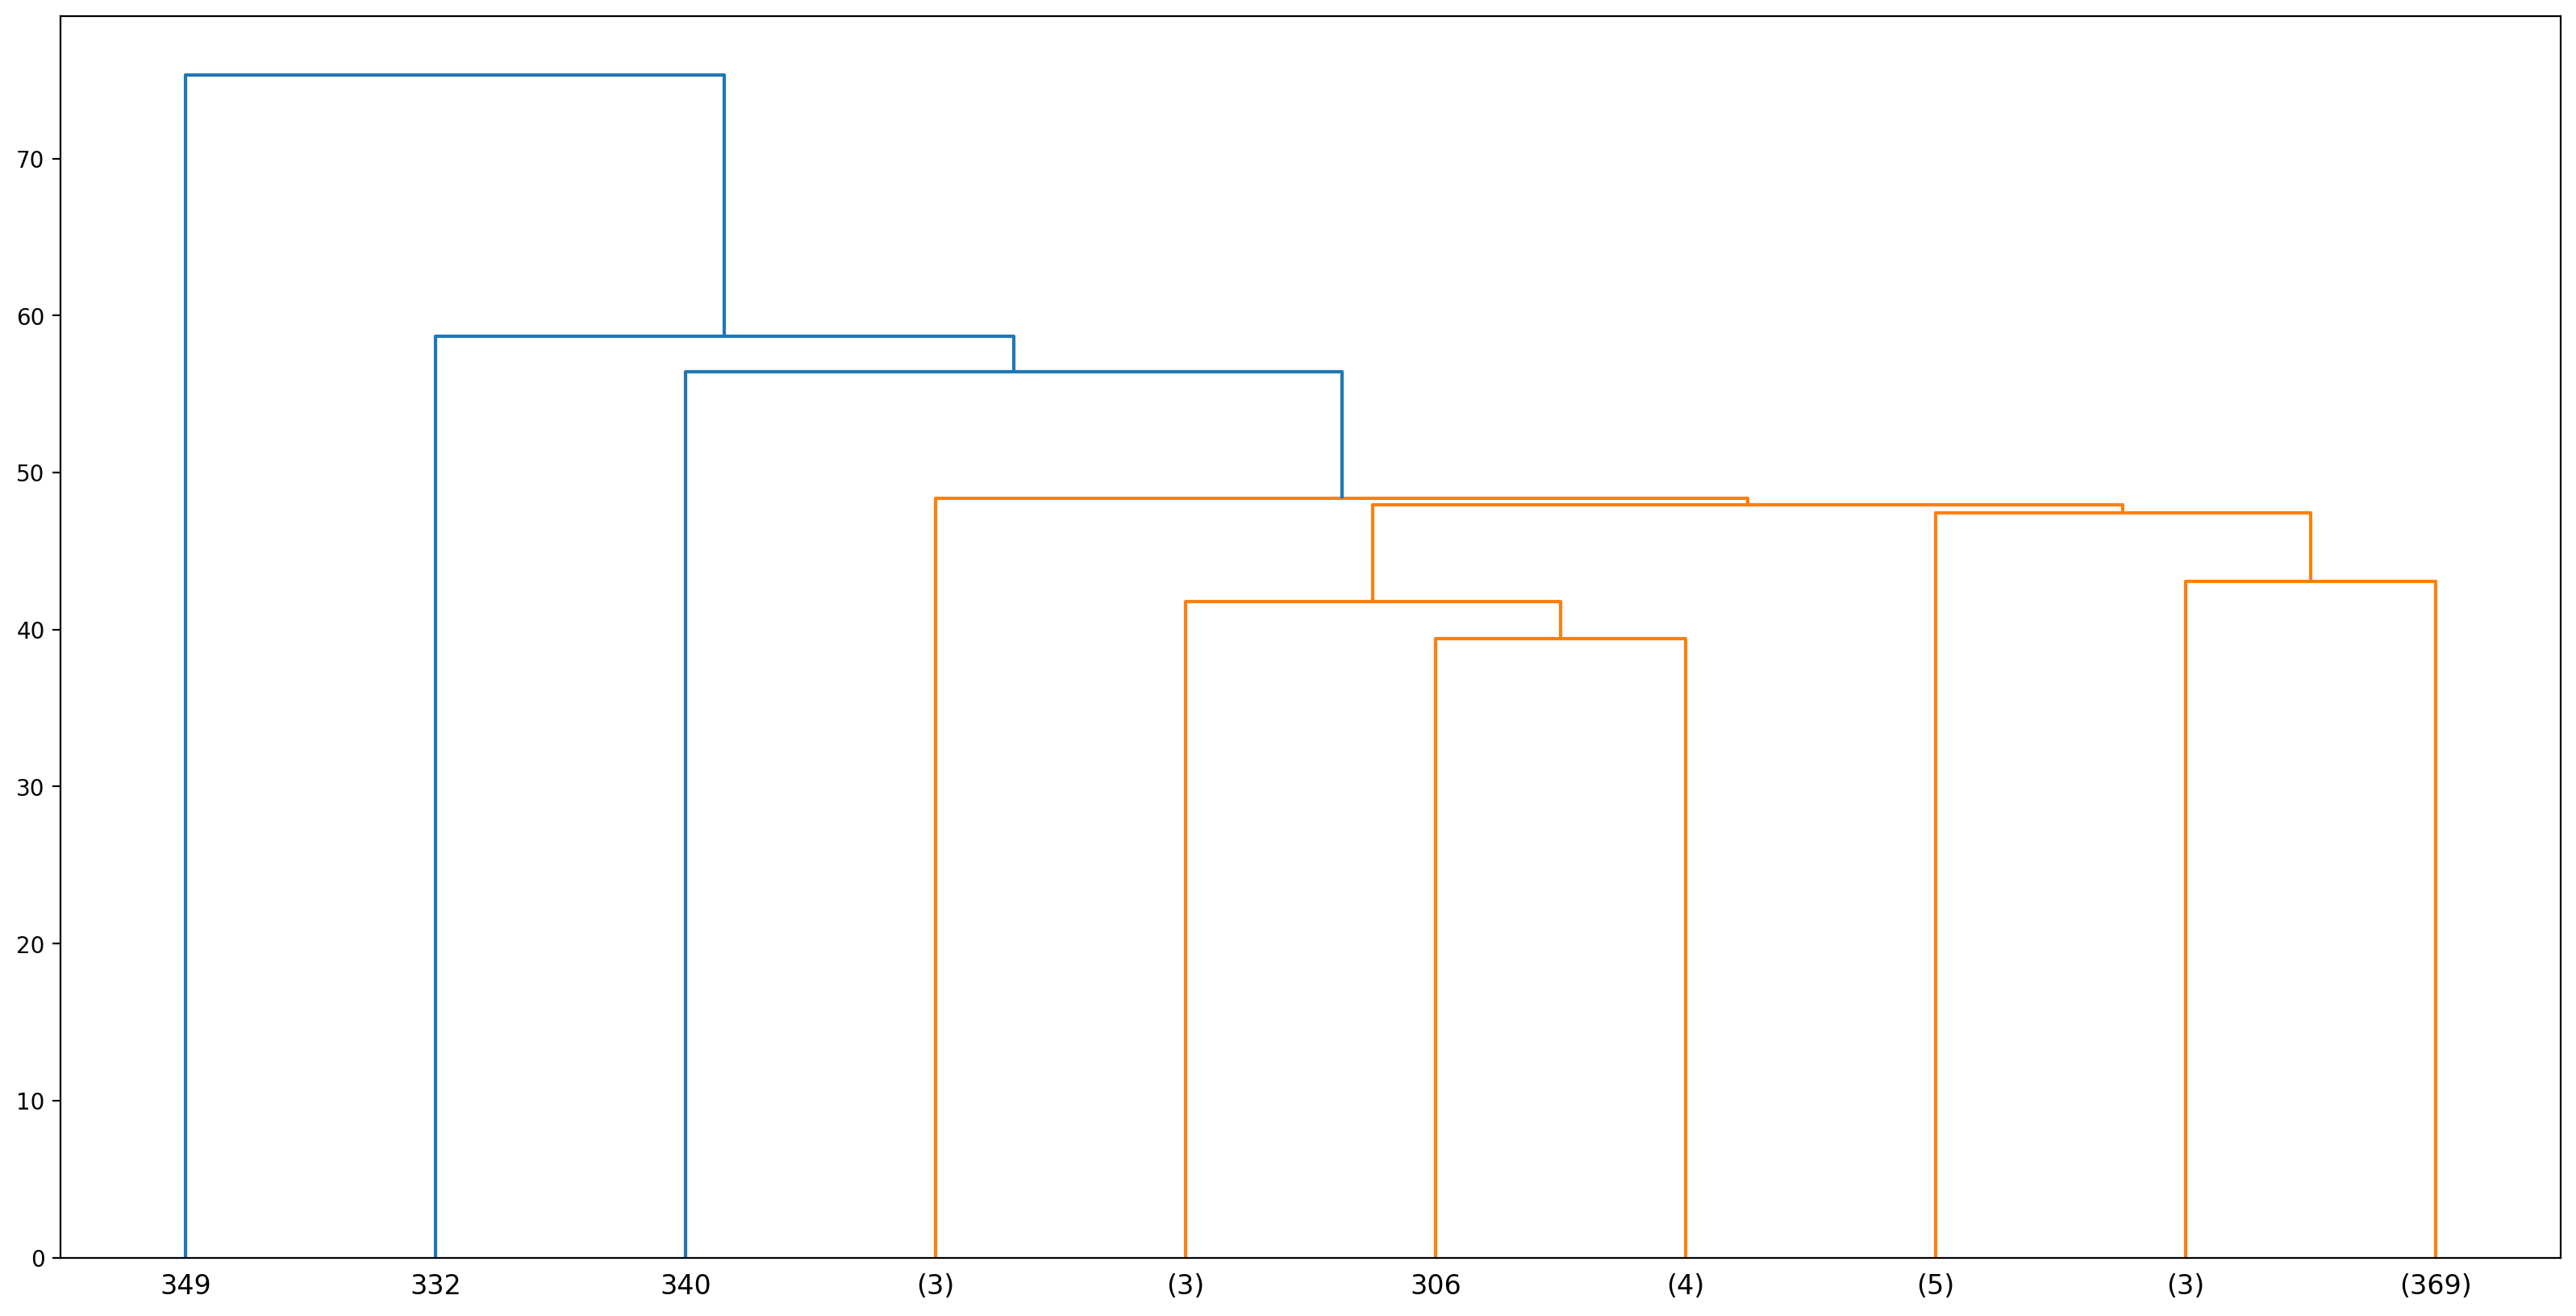

In [47]:
plt.figure(figsize=(20,10), dpi=200)
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=10)

In [55]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]


In [51]:
distance = np.linalg.norm(car_a - car_b)
print(distance)

2.3852929970374714
